# BCG X Challenge - Amigos do Bem

Transformando o sertão com dados!

O Amigos do Bem é uma organização sem fins lucrativos que atua há 30 anos no sertão nordestino, transformando vidas por meio de ações de educação, saúde, trabalho e renda. A organização atende mais de 150 mil pessoas em 300 povoados, localizadas em 3 estados do Nordeste: Alagoas, Ceará e Pernambuco.

Assim, viu-se a necessidade de criar um padrão de avaliação de impacto social, que permitisse a comparação entre os povoados atendidos pela organização. Para isso, foi criado o Índice de Desenvolvimento Humano Sertão (IDHSertão), que é composto por 3 dimensões: educação, saúde e renda. Cada dimensão é composta por 3 indicadores, que por sua vez são compostos por 3 variáveis. O IDHSertão é calculado a partir da média ponderada dos indicadores, que são calculados a partir da média ponderada das variáveis.


Grupo 14

Integrantes:
- Marcos Vinícius Moura
- Priscila Falcão
- Raphael Lisboa Antunes
- Thomas Barton

### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Tratamento das bases de dados

In [2]:
# Importando dados dos municípios do semiárido
municipios = pd.read_excel("Dados/Municipios/lista-1262municipios-semiarido-2017.xlsx")
municipios = municipios.rename(columns=municipios.iloc[1])
municipios = municipios.drop([0, 1]).reset_index(drop=True)
municipios = municipios.drop('#', axis=1).reset_index(drop=True)

In [3]:
municipios_todos = pd.read_csv("Dados/Municipios/municipios.csv")
municipios_todos = municipios_todos[(municipios_todos['codigo_ibge'].isin(municipios['Cod IBGE']))]

In [4]:
censo = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-MUN91-00-10.csv")
censo = censo[(censo['Codmun7'].isin(municipios['Cod IBGE']))]
censo_siglas = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-Siglas.csv")

In [5]:
idh_tot = pd.read_csv("Dados/Registros_Administrativos/dados_registros_administrativos_total_2012_2027.csv")

In [6]:
# Dados pegos do site oficial do IBGE por estado, tratados e concatenados em um único csv

dados_ibge = pd.read_csv("Dados/Dados IBGE/Dados IBGE.csv")
dados_ibge = dados_ibge[(dados_ibge['Munic&iacute;pio [-]'].isin(municipios['Cod IBGE']))]

In [7]:
idh_tot_to_merge = idh_tot.drop_duplicates(subset='IBGE7', keep='last').reset_index(drop=True)
censo_to_merge = censo.drop_duplicates(subset='Codmun7', keep='last').reset_index(drop=True)
censo_idh_merged = pd.merge(idh_tot_to_merge[['IBGE7', 'NOME', 'POP_TOT']], censo_to_merge[['Codmun7', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']], left_on='IBGE7', right_on='Codmun7', how='inner')
df = censo_idh_merged.drop('Codmun7', axis=1)

In [8]:
df = pd.merge(df, municipios[['Cod IBGE', 'UF']], left_on='IBGE7', right_on='Cod IBGE', how='inner')
df = pd.merge(df, municipios_todos[['codigo_ibge', 'latitude', 'longitude']], left_on='IBGE7', right_on='codigo_ibge', how='inner')
df = df.drop(['Cod IBGE', 'codigo_ibge'], axis=1)
df = df.sort_values(by='IBGE7')

In [9]:
dados_ibge = dados_ibge.sort_values(by='Munic&iacute;pio [-]').reset_index(drop=True)
df['AREA_KM²'] = dados_ibge['Prefeito [2021]']
df['POP/KM²'] = dados_ibge['Popula&ccedil;&atilde;o residente - pessoas [2022]']

In [10]:
censo_siglas[(censo_siglas['SIGLA'].isin(['PIA18M']))] # Linha de código para pegar informação de siglas que não soubermos durante o período de desenvolvimento

SIGLA                    NOME CURTO  \
228  PIA18M  População de 18 anos ou mais   

                                      NOME LONGO  \
228  População de 18 anos ou mais em idade ativa   

                                  DEFINIÇÃO  
228  População residente nessa faixa etária

In [11]:
# Municípios que já tem a ajuda do Amigos do Bem ordenados por IDHM

df[(df['IBGE7'].isin([2602803, 2607000, 2308104, 2708402]))].sort_values(by=['IDHM'])

IBGE7                NOME  POP_TOT   IDHM  IDHM_E  IDHM_L  IDHM_R  UF  \
753  2607000               Inajá    22801  0.523   0.400   0.711   0.503  PE   
722  2602803              Buíque    57696  0.527   0.395   0.746   0.497  PE   
861  2708402  São José da Tapera    32626  0.527   0.409   0.703   0.508  AL   
290  2308104             Mauriti    46548  0.605   0.526   0.772   0.544  CE   

     latitude  longitude  AREA_KM²  POP/KM²  
753  -8.90206   -37.8351  1231.362    20.79  
722  -8.61954   -37.1606  1336.544    38.98  
861  -9.55768   -37.3831   490.879    62.35  
290  -7.38597   -38.7708  1079.011    42.22

In [12]:
# Municípios com IDHM menor ou igual a 0.5 ordenados (média do sertão é 0.55)

df[df['IDHM'] <= 0.5].sort_values(by='IDHM')

IBGE7                             NOME  POP_TOT   IDHM  IDHM_E  \
840   2703304                           Inhapi    18652  0.484   0.316   
151   2209658  São Francisco de Assis do Piauí     5657  0.485   0.336   
1016  2916500                        Itapicuru    36211  0.486   0.319   
769   2609154                           Manari    21047  0.487   0.354   
49    2202653                          Caxingó     5330  0.488   0.329   
23    2201739                 Betânia do Piauí     6106  0.489   0.342   
851   2706000                         Olivença    11772  0.493   0.345   
50    2202703                            Cocal    27338  0.497   0.334   
52    2202729                  Cocal dos Alves     6054  0.498   0.315   
14    2201051                Assunção do Piauí     7717  0.499   0.382   

      IDHM_L  IDHM_R  UF  latitude  longitude  AREA_KM²  POP/KM²  
840    0.718   0.501  AL  -9.22594   -37.7509   372.019    40.77  
151    0.734   0.462  PI  -8.23599   -41.6873  1072.311     5.20  
1016   0.711   0.505  BA -11.30880   -38.2262  1557.685    20.34  
769    0.682   0.477  PE  -8.96490   -37.6313   344.685    68.94  
49     0.708   0.498  PI  -3.41904   -41.8955   491.093    11.19  
23     0.702   0.486  PI  -8.14376   -40.7989   579.576    10.73  
851    0.677   0.513  AL  -9.51954   -37.1954   175.288    61.68  
50     0.712   0.516  PI  -3.47279   -41.5546  1294.133    21.80  
52     0.779   0.504  PI  -3.62047   -41.4402   324.856    19.66  
14     0.706   0.462  PI  -5.86500   -41.0389  1690.703     4.41

In [13]:
# Municípios com população maior ou igual a 15000 (o menor valor de população nas cidades já ajudadas pelos Amigos do Bem é de 18000) e IDHM menor ou igual a 0.5 ordenados (média do sertão é 0.55)

df[(df['POP_TOT'] >= 2000) & (df['IDHM'] < 0.5)].sort_values(by='IDHM')

IBGE7                             NOME  POP_TOT   IDHM  IDHM_E  \
840   2703304                           Inhapi    18652  0.484   0.316   
151   2209658  São Francisco de Assis do Piauí     5657  0.485   0.336   
1016  2916500                        Itapicuru    36211  0.486   0.319   
769   2609154                           Manari    21047  0.487   0.354   
49    2202653                          Caxingó     5330  0.488   0.329   
23    2201739                 Betânia do Piauí     6106  0.489   0.342   
851   2706000                         Olivença    11772  0.493   0.345   
50    2202703                            Cocal    27338  0.497   0.334   
52    2202729                  Cocal dos Alves     6054  0.498   0.315   
14    2201051                Assunção do Piauí     7717  0.499   0.382   

      IDHM_L  IDHM_R  UF  latitude  longitude  AREA_KM²  POP/KM²  
840    0.718   0.501  AL  -9.22594   -37.7509   372.019    40.77  
151    0.734   0.462  PI  -8.23599   -41.6873  1072.311     5.20  
1016   0.711   0.505  BA -11.30880   -38.2262  1557.685    20.34  
769    0.682   0.477  PE  -8.96490   -37.6313   344.685    68.94  
49     0.708   0.498  PI  -3.41904   -41.8955   491.093    11.19  
23     0.702   0.486  PI  -8.14376   -40.7989   579.576    10.73  
851    0.677   0.513  AL  -9.51954   -37.1954   175.288    61.68  
50     0.712   0.516  PI  -3.47279   -41.5546  1294.133    21.80  
52     0.779   0.504  PI  -3.62047   -41.4402   324.856    19.66  
14     0.706   0.462  PI  -5.86500   -41.0389  1690.703     4.41

In [14]:
# Informações dos estados do Nordeste do IBGE

todos_estados = pd.read_csv("Dados/Dados IBGE/Estados IBGE.csv")
todos_estados = todos_estados[todos_estados['C&oacute;digo [-]'].isin(municipios_todos['codigo_uf'])]

In [15]:
# Ordenação de estados por IDH

todos_estados.sort_values(by='IDH &lt;span&gt;Índice de desenvolvimento humano&lt;/span&gt; [2021]')

UF [-]  C&oacute;digo [-]  \
9       Maranh&atilde;o                 21   
1               Alagoas                 27   
17         Piau&iacute;                 22   
4                 Bahia                 29   
14       Para&iacute;ba                 25   
25              Sergipe                 28   
16           Pernambuco                 26   
19  Rio Grande do Norte                 24   
5          Cear&aacute;                 23   
12         Minas Gerais                 31   

                                 Gent&iacute;lico [-]  \
9                                          maranhense   
1                                            alagoano   
17                                          piauiense   
4                                              baiano   
14                                          paraibano   
25                            sergipano ou sergipense   
16                                       pernambucano   
19  potiguar ou  norte-rio-grandense ou  rio-grand...   
5                                            cearense   
12                                            mineiro   

                              Governador [2023]          Capital [2010]  \
9   CARLOS ORLEANS BRAND&Atilde;O J&Uacute;NIOR  S&atilde;o Lu&iacute;s   
1                PAULO SURUAGY DO AMARAL DANTAS           Macei&oacute;   
17                        RAFAEL TAJRA FONTELES                Teresina   
4                JER&Ocirc;NIMO RODRIGUES SOUZA                Salvador   
14               JO&Atilde;O AZEVEDO LINS FILHO      Jo&atilde;o Pessoa   
25                  F&Aacute;BIO CRUZ MITIDIERI                 Aracaju   
16                  RAQUEL TEIXEIRA LYRA LUCENA                  Recife   
19                      MARIA DE FATIMA BEZERRA                   Natal   
5                    ELMANO DE FREITAS DA COSTA               Fortaleza   
12                              ROMEU ZEMA NETO          Belo Horizonte   

    &Aacute;rea Territorial - km&sup2; [2022]  \
9                                  329651.496   
1                                   27830.661   
17                                 251755.481   
4                                  564760.429   
14                                  56467.242   
25                                  21938.188   
16                                  98067.877   
19                                  52809.599   
5                                  148894.447   
12                                 586513.983   

    Popula&ccedil;&atilde;o residente - pessoas [2022]  \
9                                             6775152    
1                                             3127511    
17                                            3269200    
4                                            14136417    
14                                            3974495    
25                                            2209558    
16                                            9058155    
19                                            3302406    
5                                             8791688    
12                                           20538718    

    Densidade demogr&aacute;fica - hab/km&sup2; [2022]  \
9                                               20.55    
1                                              112.38    
17                                              12.99    
4                                               25.03    
14                                              70.39    
25                                             100.72    
16                                              92.37    
19                                              62.53    
5                                               59.05    
12                                              35.02    

    Matrículas no ensino fundamental - matr&iacute;culas [2021]  \
9                                             1112636              
1                                              458782              
17                                

In [16]:
# Valores de IDH por estado, pegando a média dos IDHMs das cidades de cada estado

df.groupby('UF')[['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].mean().sort_values(by='IDHM')

IDHM    IDHM_E    IDHM_L    IDHM_R
UF                                        
AL  0.550763  0.424947  0.739342  0.533632
PI  0.570832  0.456903  0.747827  0.547308
MA  0.585000  0.490500  0.738500  0.555500
PE  0.585154  0.473504  0.749797  0.566748
BA  0.585554  0.475133  0.754540  0.562388
SE  0.586000  0.472345  0.745207  0.574103
PB  0.588541  0.478737  0.757345  0.564144
RN  0.609762  0.516354  0.762707  0.577395
MG  0.613231  0.504132  0.792835  0.579209
CE  0.614114  0.549074  0.760617  0.555977

### Análise exploratória dos dados

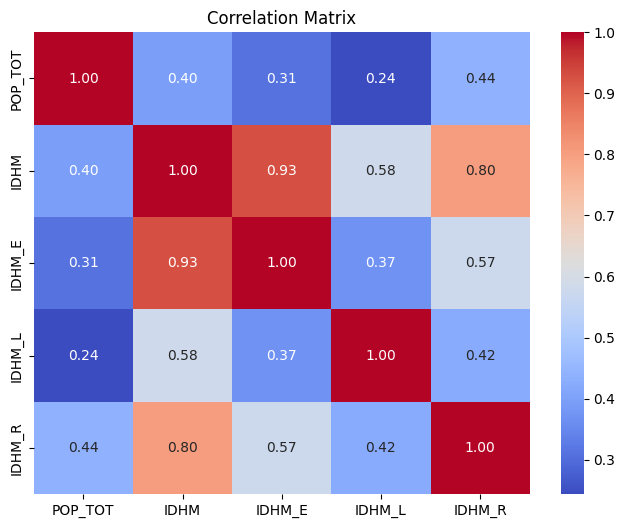

In [17]:
# Correlação dos dados de IDH dos municípios

correlation_df = df.copy()
correlation_df = correlation_df.drop(['IBGE7', 'NOME', 'UF', 'latitude', 'longitude', 'AREA_KM²', 'POP/KM²'], axis=1)
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

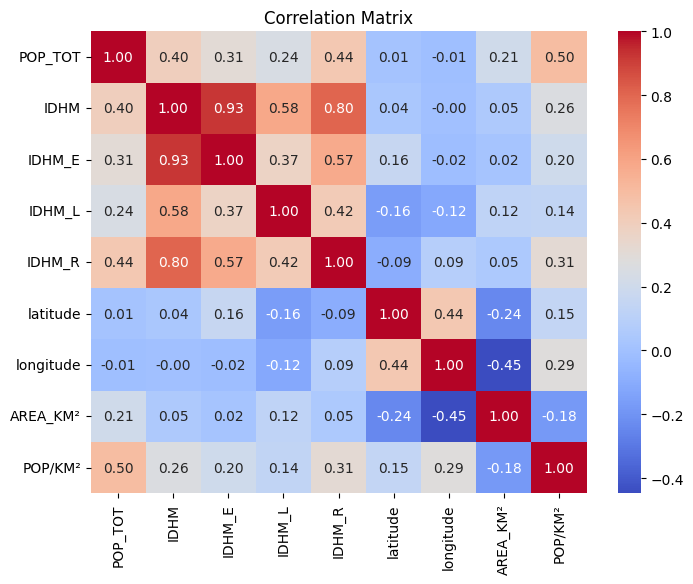

In [18]:
# Correlação de todos os dados do dataframe tratado

correlation_df = df.copy()
correlation_df = correlation_df.drop(['IBGE7', 'NOME', 'UF'], axis=1)
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0, 0.5, 'IDHM_E')

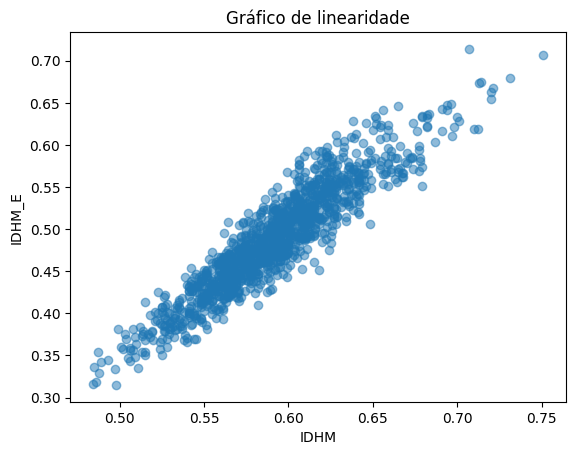

In [19]:
# Gráfico mostrando a linearidade entre os valores de IDHM e IDHM_E

x = df['IDHM']
y = df['IDHM_E']

df[(df['POP_TOT'] >= 15000) & (df['IDHM'] < 0.52)]['IDHM']

plt.scatter(x, y, alpha=0.5)
plt.title('Gráfico de linearidade')
plt.xlabel('IDHM')
plt.ylabel('IDHM_E')

### Análise dos custos

In [20]:
final_towns = df[(df['POP_TOT'] >= 15000) & (df['IDHM'] < 0.52)].copy().reset_index(drop=True)

In [21]:
transporte = pd.read_csv("Dados/Transportes/transport_cost.csv")
transporte = transporte[(transporte['codigo_ibge'].isin(final_towns['IBGE7']))]
min_cost_indices = transporte.groupby('codigo_ibge')['transportation_cost'].idxmin()
transporte = transporte.loc[min_cost_indices].sort_values(by=['codigo_ibge'])
final_towns['CUSTO_TRANSPORTE'] = transporte['transportation_cost'].reset_index(drop=True)

In [22]:
# Análise dos custos de transporte dos municípios filtrados

final_towns.sort_values(by='CUSTO_TRANSPORTE')

IBGE7               NOME  POP_TOT   IDHM  IDHM_E  IDHM_L  IDHM_R  UF  \
8   2916500          Itapicuru    36211  0.486   0.319   0.711   0.505  BA   
12  2926509  Ribeira do Amparo    15443  0.512   0.384   0.694   0.503  BA   
10  2924207    Pedro Alexandre    18209  0.513   0.354   0.778   0.489  BA   
2   2608404             Jurema    15284  0.509   0.372   0.681   0.522  PE   
9   2921500        Monte Santo    51953  0.506   0.359   0.699   0.515  BA   
6   2703304             Inhapi    18652  0.484   0.316   0.718   0.501  AL   
5   2701605             Canapi    17983  0.506   0.357   0.719   0.504  AL   
1   2607505             Itaíba    26314  0.510   0.364   0.688   0.531  PE   
7   2705002        Mata Grande    25589  0.504   0.369   0.685   0.506  AL   
3   2609154             Manari    21047  0.487   0.354   0.682   0.477  PE   
4   2615805        Tupanatinga    26990  0.519   0.379   0.747   0.494  PE   
13  2932457          Umburanas    19522  0.515   0.413   0.705   0.469  BA   
11  2924405       Pilão Arcado    35740  0.506   0.343   0.737   0.514  BA   
0   2202703              Cocal    27338  0.497   0.334   0.712   0.516  PI   

    latitude  longitude   AREA_KM²  POP/KM²  CUSTO_TRANSPORTE  
8  -11.30880   -38.2262   1557.685    20.34       23766.05503  
12 -11.04210   -38.4242    644.229    21.48       23986.17667  
10 -10.01200   -37.8932    889.572    15.69       24348.88519  
2   -8.70714   -36.1347    148.254    92.06       24446.52253  
9  -10.43740   -39.3321   3034.197    15.75       24661.74527  
6   -9.22594   -37.7509    372.019    40.77       24731.10036  
5   -9.11932   -37.5967    602.778    25.81       24734.22180  
1   -8.94569   -37.4173   1061.694    30.75       24766.12422  
7   -9.11824   -37.7323    914.722    23.88       24784.14603  
3   -8.96490   -37.6313    344.685    68.94       24832.77179  
4   -8.74798   -37.3445    934.801    28.82       24850.50406  
13 -10.73390   -41.3234   1775.633     7.68       25289.36339  
11 -10.00510   -42.4936  11597.923     3.05       26145.92479  
0   -3.47279   -41.5546   1294.133    21.80       29323.30652

In [23]:
# Análise de possíveis exportações nos municípios filtrados

exportacao = pd.read_csv("Dados/COMEX/EXP_2022_MUN.csv", sep = ';')
exp_leg = pd.read_csv("Dados/COMEX/sh4_agropecuaria.csv", sep = ',')
exp_sem = exportacao[(exportacao['SG_UF_MUN'].isin(final_towns['UF'])) & (exportacao['SH4'].isin(exp_leg['Código SH4']))]

In [24]:
exp_sem[(exp_sem['VL_FOB'] > exp_sem['KG_LIQUIDO']) & (exp_sem['SG_UF_MUN'] == 'PI') & (exp_sem['VL_FOB']/exp_sem['KG_LIQUIDO'] > 0) & (exp_sem['KG_LIQUIDO'] > 0)].sort_values(['VL_FOB'], ascending=False)

CO_ANO  CO_MES   SH4  CO_PAIS SG_UF_MUN   CO_MUN  KG_LIQUIDO  VL_FOB
621667    2022      10  5201      858        PI  2201903       79435  167238
943885    2022      10  1702       23        PI  2208007           1       5

In [25]:
exp_leg = pd.read_csv("Dados/COMEX/sh4_agropecuaria.csv", sep = ',')

In [26]:
# Possíveis produtos a serem exportados do estado de Alagoas

exp_leg[exp_leg['Código SH4'].isin([4811, 4802, 1507])]

Código SH4                     Descrição do produto exportado  \
25        4802  Papel e cartão, não revestidos, dos tipos util...   
34        4811  Papel, cartão, pasta (ouate) de celulose e man...   
54        1507  Óleo de soja e respectivas frações, mesmo refi...   
61        1507  Óleo de soja e respectivas frações, mesmo refi...   

   Denominação nesse estudo  
25                    Papel  
34                    Papel  
54             Óleo de soja  
61             Óleo de soja

In [27]:
# Possíveis produtos a serem exportados do estado de Piauí

exp_leg[exp_leg['Código SH4'].isin([1702, 5201])]

Código SH4                     Descrição do produto exportado  \
0         5201                 Algodão, não cardado nem penteado.   
13        1702  Outros açúcares, incluindo a lactose, maltose,...   

   Denominação nesse estudo  
0                   Algodão  
13                   Açúcar

In [28]:
exp_leg

Código SH4                     Descrição do produto exportado  \
0         5201                 Algodão, não cardado nem penteado.   
1         5203                       Algodão cardado ou penteado.   
2         1404  Produtos vegetais não especificados nem compre...   
3         5204  Linhas para costurar, de algodão, mesmo acondi...   
4         5205  Fios de algodão (exceto linhas para costurar),...   
..         ...                                                ...   
63        1108                                  Amidos e féculas.   
64        1005                                              Milho   
65        1102  Farinhas de cereais, exceto de trigo ou de mis...   
66        1103              Grumos, sêmolas e pellets de cereais.   
67        2009                                    Suco de laranja   

                             Denominação nesse estudo  
0                                             Algodão  
1                                             Algodão  
2                               Coprodutos do Algodão  
3                               Coprodutos do Algodão  
4                               Coprodutos do Algodão  
..                                                ...  
63                  Farelo/Farinha e Resíduos Sólidos  
64                                Milho/Soja em Grãos  
65                  Farelo/Farinha e Resíduos Sólidos  
66                  Farelo/Farinha e Resíduos Sólidos  
67  Sumos de frutas (incluídos os mostos de uvas) ...  

[68 rows x 3 columns]